## Imports

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import torchvision.datasets as datasets
import phate

## Loading Data

In [26]:
trainset = datasets.MNIST(root='./data', train=True, download=True)
testset = datasets.MNIST(root='./data', train=False, download=True)

train_x = trainset.data.reshape(-1, 28*28) / 255
train_x = train_x.numpy().astype(np.float32)

test_x = testset.data.reshape(-1, 28*28) / 255
test_x = test_x.numpy().astype(np.float32)


## PHATE

In [27]:
t_s = [10, 'auto', 40]

data = []

for i,t in enumerate(t_s):
    phate_operator = phate.PHATE(t=t, n_jobs=9)
    data_phate = phate_operator.fit_transform(train_x)
    data.append(data_phate)


Calculating PHATE...
  Running PHATE on 60000 observations and 784 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 3.49 seconds.
    Calculating KNN search...
    Calculated KNN search in 241.11 seconds.
    Calculating affinities...
    Calculated affinities in 0.91 seconds.
  Calculated graph and diffusion operator in 245.59 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 6.00 seconds.
    Calculating KMeans...
    Calculated KMeans in 4.01 seconds.
  Calculated landmark operator in 13.52 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.44 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 7.66 seconds.
Calculated PHATE in 267.22 seconds.
Calculating PHATE...
  Running PHATE on 60000 observations and 784 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.77 seconds.
    Calculating KNN searc

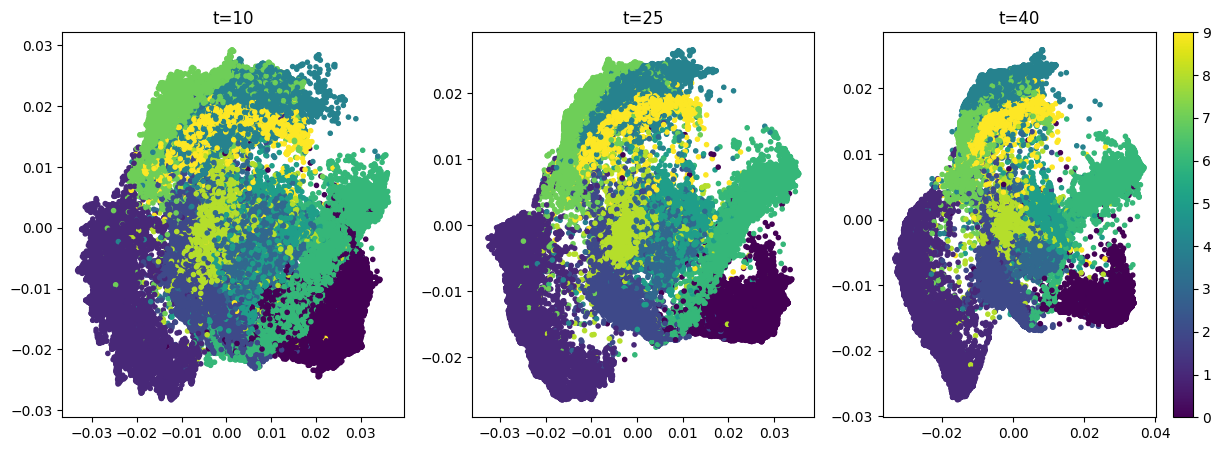

In [70]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, t in enumerate([10, 25, 40]):
    sc = axs[i].scatter(data[i][:, 0], data[i][:, 1], c=trainset.targets, marker='.')
    axs[i].set_title(f"t={t}")


plt.colorbar(sc)
plt.show()

## K Means

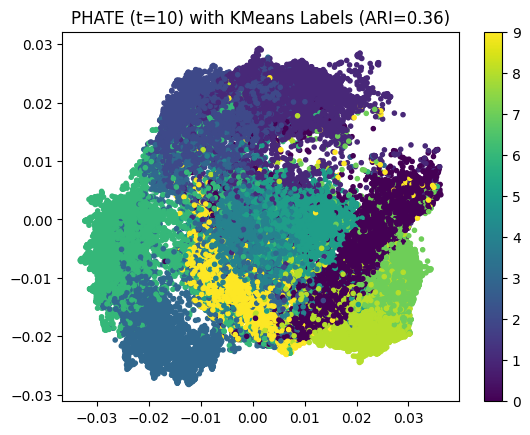

In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

kmeans = KMeans(n_clusters=10, random_state=0).fit(train_x)

k_means_ari = adjusted_rand_score(trainset.targets, kmeans.labels_)
print(k_means_ari)

plt.scatter(data[0][:, 0], data[0][:, 1], c=kmeans.labels_, marker='.')
plt.title(f"PHATE (t={t_s[0]}) with KMeans Labels (ARI={k_means_ari:.2f})")
plt.colorbar()
plt.show()

## Spectral Clustering

0.36558157410815434


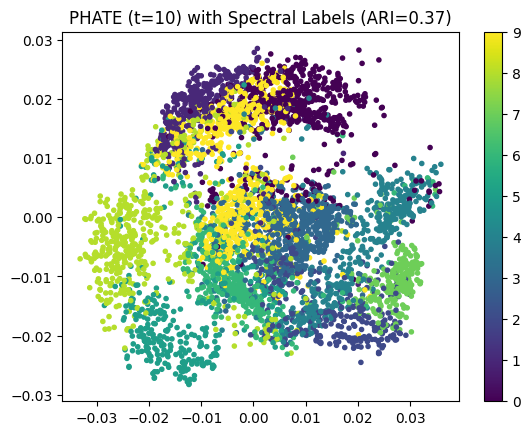

In [72]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score

np.random.seed(0)
spectral_indices = np.random.choice(train_x.shape[0], 5_000, replace=False)

spectral_x = train_x[spectral_indices]
spectral_labels = trainset.targets[spectral_indices]

spectral = SpectralClustering(n_clusters=10, gamma=.005, random_state=0, n_jobs=8).fit(spectral_x)

spectral_ari = adjusted_rand_score(spectral_labels, spectral.labels_)

plt.scatter(data[0][spectral_indices, 0], data[0][spectral_indices, 1], c=spectral.labels_, marker='.')
plt.title(f"PHATE (t={t_s[0]}) with Spectral Labels (ARI={spectral_ari:.2f})")
plt.colorbar()
plt.show()

## Modified PHATE

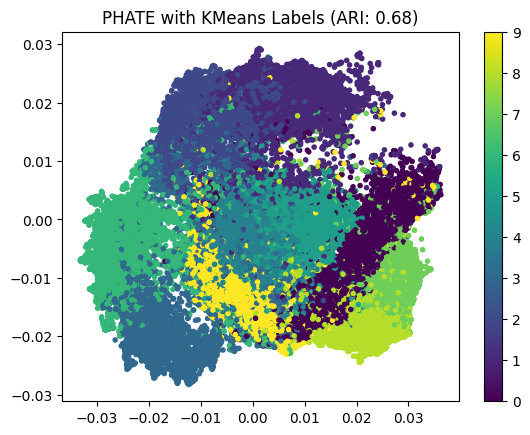

In [73]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

phate = phate.PHATE(n_components=10, n_jobs=9)
data_phate = phate.fit_transform(train_x)

kmeans = KMeans(n_clusters=10, random_state=0).fit(data_phate)

modified_ari = adjusted_rand_score(trainset.targets, kmeans.labels_)

plt.scatter(data[0][:, 0], data[0][:, 1], c=kmeans.labels_, marker='.')
plt.title(f"PHATE with KMeans Labels (ARI: {modified_ari:.2f})")
plt.colorbar()
plt.show()